In [2]:
# import geopandas as gpd
# invector = '/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/prep/p2p/shapes/06279940/hru_lev2_elmn.gpkg'
# # invector = '/glade/work/andywood/wreg/gis/shapes/bighorn/06279940.huc12.gpkg'
# in_gpd = gpd.read_file(invector)
sum(in_gpd['areaSqm'])/10**6

1983.6154668550341

In [15]:
# check correctness of latitude and longitude of attribute file
import xarray as xr
import numpy as np

attrb_file='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/settings/attributes.hru_lev1.updated.nc'
f = xr.open_dataset(attrb_file)
lat = f['latitude'].values[:] # (hru). 
lon = f['longitude'].values[:] # (hru). 

lat = np.reshape(lat,(len(lat),1))
lon = np.reshape(lon,(len(lon),1))
data = np.concatenate((lat,lon),axis=1)
np.savetxt('attribute.loc.txt',data,fmt='%.4f',delimiter=',',header='latitude,longitude')

In [1]:
# compare my and Andy's attribute files
import os
import xarray as xr
import numpy as np

aw_dir = '/glade/u/home/andywood/proj/SHARP/wreg/complexity/06279940/settings'
hl_dir = '/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/settings'
attrb_file='attributes.hru_lev2.updated.nc'
f_aw = xr.open_dataset(os.path.join(aw_dir,attrb_file))
f_hl = xr.open_dataset(os.path.join(hl_dir,attrb_file))

elevation_aw = f_aw['elevation'].values[:] # (hru). 
elevation_hl = f_hl['elevation'].values[:] # (hru). 
np.where(elevation_aw!=elevation_hl)

hruId_aw = f_aw['hruId'].values[:] # (hru). 
hruId_hl = f_hl['hruId'].values[:] # (hru). 
np.where(hruId_aw!=hruId_hl)


(array([], dtype=int64),)

In [31]:
# compare hyruID before and after ordering
import os
import xarray as xr
import numpy as np

weight_file1='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/prep/p2p/maps/spweights.nldas125_to_hru_lev0.06279940.nc'
weight_file2='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/prep/p2p/maps/spweights.nldas125_to_hru_lev1.06279940.reorder.nc'

f1 = xr.open_dataset(weight_file1)
f2 = xr.open_dataset(weight_file2)

polyid1 = f1['polyid'].values[:] # (polyid1). 
polyid2 = f2['polyid'].values[:] # (polyid1). 
# np.where(polyid1!=polyid2)

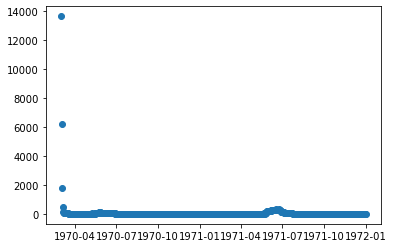

In [22]:
# find out seg_id for shoshone
import argparse
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

q_ncfile = '/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/route_out/sflow.hru_lev1.nc'

ds = xr.open_dataset(q_ncfile) #, decode_times=False
time = ds['time'].values[:]
q =  ds['IRFroutedRunoff'].values[:]

time = pd.to_datetime(time)
plt.plot_date(time, q)

read
hru_lev1
hru_lev2
hru_lev3
plot
hru_lev1
hru_lev2
hru_lev3


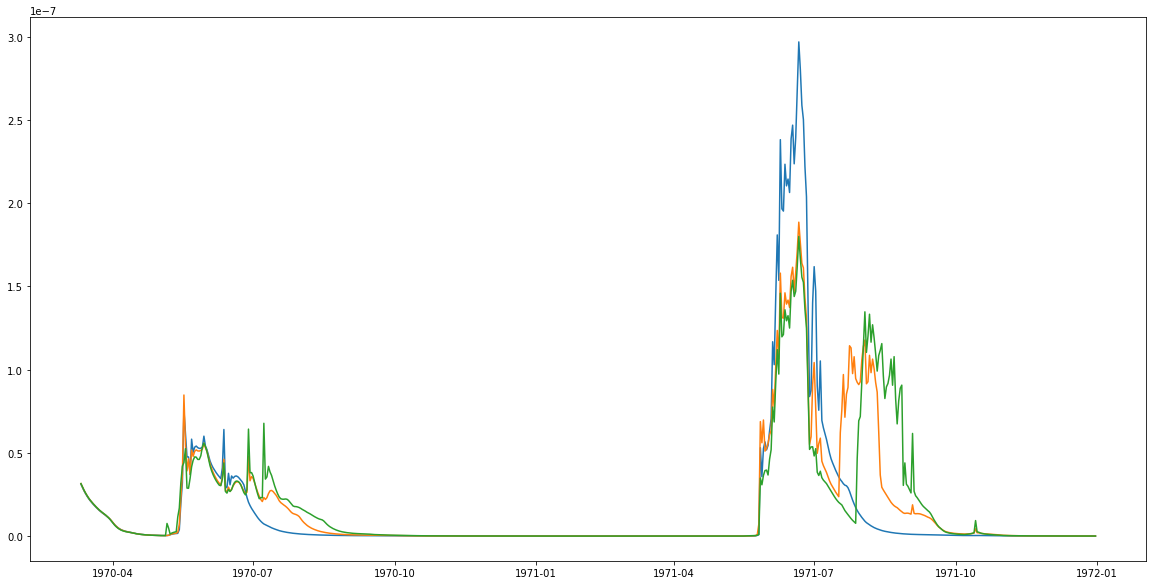

Done


In [3]:
# compare summa output 
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

root_dir='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/output'
level_num=3
label_basename='hru_lev'

# read summa simulated output
print('read')
q_dic = {}
for level_id in range(1,level_num+1):
    label=label_basename+str(level_id)
    print(label)
    
    q_ncfile = os.path.join(root_dir,label,'wbout_day.nc')
    ds = xr.open_dataset(q_ncfile) 
    time = ds['time'].values[:]
    time = pd.to_datetime(time)
    q =  ds['averageRoutedRunoff_mean'].values[:] #(time, gru)

    df = pd.DataFrame(q[10:,:], index=time[10:])
    q_dic[label]=df

# plot summa simulated output
print('plot')
seg_id = 10
fig = plt.figure(figsize=(20, 10))
for level_id in range(1,level_num+1):
    label=label_basename+str(level_id)
    print(label)
    
    df = q_dic[label]
    plt.plot(df.index, df[seg_id])
plt.show()
print('Done')

In [1]:
# compare parameters between trialParams.hru_lev0.nc and trialParams.06279940.v1.nc
import os
import xarray as xr
import numpy as np

file1='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/calib/06279940/settings/trialParams.hru_lev0.ost.nc'
file2='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/calib/06279940/settings/trialParams.hru_lev0.nc'

f1 = xr.open_dataset(file1)
f2 = xr.open_dataset(file2)

polyid1 = f1['hruId'].values[:] # (hru). 
polyid2 = f2['hruId'].values[:] # (hru). 
np.where(polyid1!=polyid2)

k_macropore1 = f1['k_macropore'].values[:] # (hru). 
k_macropore2 = f2['k_macropore'].values[:] # (hru)
np.where(k_macropore1!=k_macropore2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),)

In [4]:
# compare state files before and afrer re-start run
import os
import xarray as xr
import numpy as np

file1='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/settings/coldState.3l3h_100cm.hru_lev0.nc'
file2='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/settings/states/coldState.3l3h_100cm.hru_lev0.nc'

f1 = xr.open_dataset(file1)
f2 = xr.open_dataset(file2)

polyid1 = f1['hruId'].values[:] # (hru). 
polyid2 = f2['hruId'].values[:] # (hru). 
np.where(polyid1!=polyid2)

scalarSWE1 = f1['scalarSWE'].values[:] # (hru). 
scalarSWE2 = f2['scalarSWE'].values[:] # (hru)
np.where(scalarSWE1!=scalarSWE2)

scalarSnowDepth1 = f1['scalarSnowDepth'].values[:] # (hru). 
scalarSnowDepth2 = f2['scalarSnowDepth'].values[:] # (hru)
np.where(scalarSnowDepth1!=scalarSnowDepth2)

(array([], dtype=int64), array([], dtype=int64))

In [6]:
# compare parameters before and after ostrich
import os
import xarray as xr
import numpy as np

file1='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/settings/trialParams.06279940.v1.nc'
file2='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/settings/trialParams.hru_lev0.nc'

f1 = xr.open_dataset(file1)
f2 = xr.open_dataset(file2)

polyid1 = f1['hruId'].values[:] # (hru). 
polyid2 = f2['hruId'].values[:] # (hru). 
np.where(polyid1!=polyid2)

[100800120304,
 100800120302,
 100800120303,
 100800120301,
 100800120209,
 100800120207,
 100800120204,
 100800120205,
 100800120208,
 100800120206,
 100800120105,
 100800120201,
 100800120202,
 100800120203,
 100800120101,
 100800120102,
 100800120103,
 100800120104]

In [26]:
q_dic['hru_lev3']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1970-03-11,1.789129e-08,2.471277e-08,2.861510e-08,3.381930e-08,2.523456e-08,2.606363e-08,3.175941e-08,2.420181e-08,2.437740e-08,1.685451e-08,3.123564e-08,2.039015e-08,1.582545e-08,1.697398e-08,1.596074e-08,3.001229e-08,1.533039e-08,1.598205e-08
1970-03-12,1.462911e-08,2.281837e-08,2.659828e-08,3.165964e-08,2.318737e-08,2.404345e-08,2.965992e-08,2.220061e-08,2.195074e-08,1.497243e-08,2.915938e-08,1.776440e-08,1.410278e-08,1.508227e-08,1.311750e-08,2.783860e-08,1.365491e-08,1.319927e-08
1970-03-13,1.234797e-08,2.109513e-08,2.474542e-08,2.962437e-08,2.133940e-08,2.219589e-08,2.771351e-08,2.040724e-08,1.976820e-08,1.336784e-08,2.724550e-08,1.552702e-08,1.255155e-08,1.330510e-08,1.119303e-08,2.583691e-08,1.222007e-08,1.133088e-08
1970-03-14,1.083834e-08,1.960362e-08,2.311774e-08,2.780343e-08,1.978509e-08,2.060251e-08,2.597718e-08,1.891433e-08,1.795885e-08,1.202081e-08,2.552579e-08,1.374299e-08,1.131021e-08,1.186465e-08,9.894778e-09,2.408430e-08,1.107647e-08,1.003674e-08
1970-03-15,9.745079e-09,1.829727e-08,2.167328e-08,2.616740e-08,1.841606e-08,1.918402e-08,2.440246e-08,1.760920e-08,1.638487e-08,1.087137e-08,2.396199e-08,1.221171e-08,1.026275e-08,1.066528e-08,8.962838e-09,2.253450e-08,1.008858e-08,9.040204e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1.464115e-11,4.592529e-11,4.423139e-11,5.395600e-11,4.579764e-11,4.750554e-11,4.911790e-11,3.369033e-11,2.373306e-11,2.777040e-11,4.892962e-11,2.019185e-11,2.781699e-11,1.763215e-11,1.861585e-11,3.953289e-11,4.133464e-11,1.755365e-11
2019-12-28,1.443923e-11,4.481251e-11,4.317830e-11,5.253940e-11,4.468444e-11,4.633476e-11,4.788622e-11,3.298841e-11,2.331747e-11,2.724480e-11,4.770407e-11,1.986506e-11,2.729014e-11,1.736547e-11,1.832674e-11,3.864264e-11,4.038371e-11,1.728884e-11
2019-12-29,1.424146e-11,4.373966e-11,4.216235e-11,5.117778e-11,4.361141e-11,4.520667e-11,4.670028e-11,3.230822e-11,2.291270e-11,2.673399e-11,4.652402e-11,1.954615e-11,2.677811e-11,1.710479e-11,1.804430e-11,3.778213e-11,3.946520e-11,1.702998e-11
2019-12-30,1.404773e-11,4.270487e-11,4.118185e-11,4.986846e-11,4.257669e-11,4.411927e-11,4.555788e-11,3.164885e-11,2.251838e-11,2.623741e-11,4.538728e-11,1.923486e-11,2.628036e-11,1.684993e-11,1.776835e-11,3.695004e-11,3.857767e-11,1.677688e-11


read
hru_lev1
hru_lev2
hru_lev3
plot
hru_lev1
hru_lev2
hru_lev3


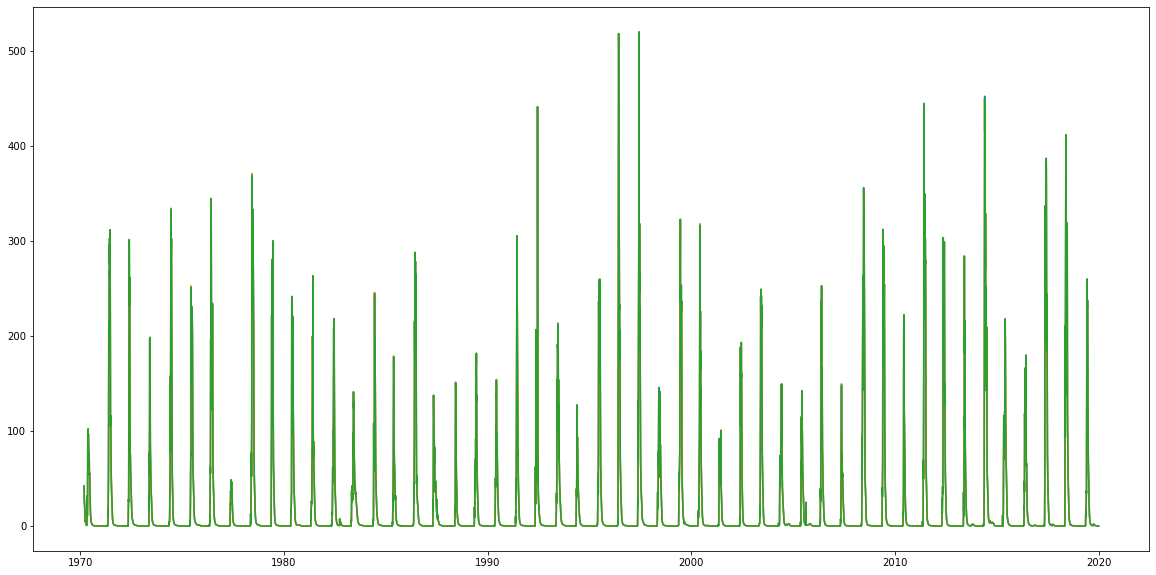

Done


In [28]:
# compare route output 
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

root_dir='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/model/06279940/route_out'
level_num=3
label_basename='hru_lev'

# read route output
print('read')
q_dic = {}
for level_id in range(1,level_num+1):
    label=label_basename+str(level_id)
    print(label)
    
    q_ncfile = os.path.join(root_dir,'sflow.'+label+'.h.1970-03-02-00000.nc')
    ds = xr.open_dataset(q_ncfile) 
    time = ds['time'].values[:]
    time = pd.to_datetime(time)
    q =  ds['IRFroutedRunoff'].values[:] #(time, seg)

    df = pd.DataFrame(q[10:,:], index=time[10:])
    q_dic[label]=df

# plot route output
print('plot')
seg_id = 10
fig = plt.figure(figsize=(20, 10))
for level_id in range(1,level_num+1):
    label=label_basename+str(level_id)
    print(label)
    
    df = q_dic[label]
    plt.plot(df.index, df[seg_id])
plt.show()
print('Done')

In [29]:
q_dic['hru_lev1']

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
1970-03-12,2.983875,6.821852,5.421614,3.527554,1.337869,1.498243,0.529292,0.701639,0.630607,2.859979,...,2.403429,0.468739,0.777168,1.873689,1.160333,0.596018,0.404237,0.405016,0.336102,0.378051
1970-03-13,2.791783,6.308739,5.006670,3.256325,1.244670,1.385139,0.471102,0.624467,0.582153,2.640155,...,2.245623,0.412237,0.726104,1.738923,1.076884,0.525807,0.356801,0.341868,0.286883,0.322602
1970-03-14,2.619969,5.861513,4.646762,3.021758,1.162797,1.287238,0.424527,0.562716,0.540365,2.450601,...,2.104860,0.365733,0.680563,1.620931,1.003819,0.468888,0.318329,0.300076,0.253648,0.285191
1970-03-15,2.465621,5.466092,4.328487,2.813285,1.090134,1.201461,0.385220,0.510608,0.503168,2.281863,...,1.977208,0.325109,0.639274,1.516593,0.939211,0.421486,0.286274,0.269808,0.229763,0.258332
1970-03-16,2.327030,5.114830,4.045731,2.627116,1.025553,1.126268,0.352231,0.466878,0.469948,2.131150,...,1.861881,0.292444,0.601977,1.424146,0.881965,0.383330,0.260450,0.251074,0.215041,0.241816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.005066,0.013032,0.010717,0.006952,0.002226,0.003012,0.001046,0.001388,0.001246,0.005651,...,0.003978,0.000523,0.001284,0.002660,0.001648,0.000697,0.000474,0.000406,0.000479,0.000537
2019-12-28,0.004933,0.012713,0.010454,0.006781,0.002173,0.002939,0.001026,0.001362,0.001215,0.005512,...,0.003878,0.000514,0.001252,0.002600,0.001610,0.000686,0.000467,0.000400,0.000471,0.000528
2019-12-29,0.004805,0.012406,0.010200,0.006616,0.002122,0.002868,0.001007,0.001336,0.001186,0.005378,...,0.003782,0.000506,0.001221,0.002542,0.001575,0.000676,0.000460,0.000395,0.000464,0.000520
2019-12-30,0.004683,0.012110,0.009956,0.006457,0.002072,0.002801,0.000988,0.001312,0.001157,0.005248,...,0.003690,0.000498,0.001191,0.002486,0.001540,0.000666,0.000453,0.000389,0.000457,0.000512


In [30]:
q_dic['hru_lev3']

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
1970-03-12,2.984035,6.821776,5.421670,3.527702,1.337732,1.498134,0.529338,0.701699,0.630633,2.860099,...,2.403473,0.461591,0.777183,1.873785,1.160392,0.596009,0.404246,0.405053,0.336114,0.378065
1970-03-13,2.791956,6.308614,5.006695,3.256472,1.244517,1.385000,0.471141,0.624515,0.582180,2.640275,...,2.245673,0.403684,0.726121,1.739023,1.076945,0.525769,0.356793,0.341892,0.286891,0.322612
1970-03-14,2.620154,5.861355,4.646765,3.021904,1.162634,1.287079,0.424557,0.562753,0.540391,2.450719,...,2.104916,0.357485,0.680581,1.621035,1.003883,0.468839,0.318313,0.300094,0.253654,0.285199
1970-03-15,2.465813,5.465914,4.328476,2.813427,1.089965,1.201292,0.385246,0.510639,0.503193,2.281979,...,1.977268,0.317820,0.639293,1.516699,0.939276,0.421433,0.286254,0.269823,0.229768,0.258339
1970-03-16,2.327227,5.114641,4.045712,2.627256,1.025380,1.126095,0.352255,0.466906,0.469973,2.131264,...,1.861944,0.286004,0.601998,1.424253,0.882032,0.383279,0.260429,0.251086,0.215045,0.241822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.005084,0.013035,0.010718,0.006952,0.002228,0.003013,0.001044,0.001385,0.001246,0.005651,...,0.003980,0.000527,0.001285,0.002661,0.001648,0.000697,0.000474,0.000405,0.000479,0.000537
2019-12-28,0.004950,0.012716,0.010455,0.006781,0.002175,0.002940,0.001024,0.001359,0.001215,0.005512,...,0.003880,0.000518,0.001253,0.002601,0.001611,0.000686,0.000466,0.000400,0.000471,0.000529
2019-12-29,0.004822,0.012409,0.010201,0.006616,0.002124,0.002869,0.001005,0.001333,0.001186,0.005378,...,0.003784,0.000510,0.001222,0.002543,0.001575,0.000676,0.000459,0.000394,0.000464,0.000521
2019-12-30,0.004699,0.012113,0.009957,0.006457,0.002074,0.002801,0.000986,0.001309,0.001157,0.005248,...,0.003691,0.000502,0.001192,0.002487,0.001540,0.000666,0.000453,0.000389,0.000457,0.000513
